In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('ex1data1.txt', names=['population', 'profit'])


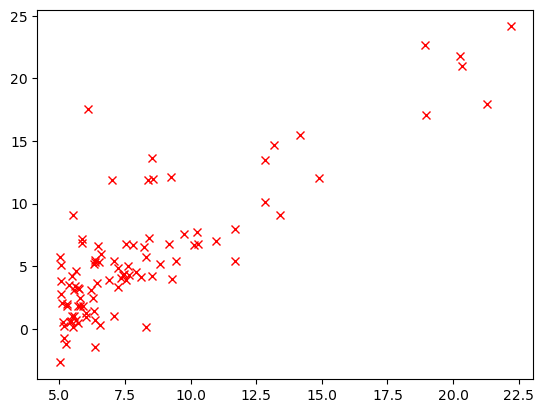

In [3]:
fig = plt.plot(data['population'], data['profit'], 'rx')